In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Roll Number 123**

Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 66%-34%

In [2]:
# Importing needful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

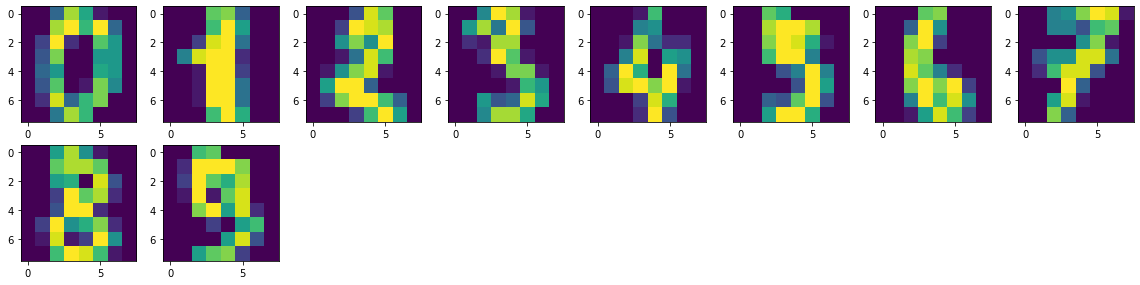

In [3]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])


# **Spliting Train-Test : 66% - 34%**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.34, random_state = 123)

In [5]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.855973813420622


In [6]:
main_data.images[3]


array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

# **True Prediction**

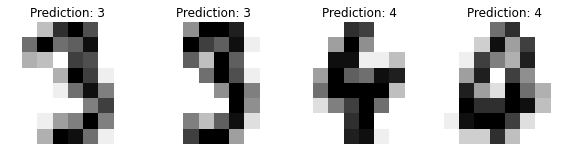

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [8]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.88      0.82      0.84        60
           2       0.88      0.79      0.83        62
           3       0.86      0.82      0.84        51
           4       0.91      0.88      0.89        66
           5       0.95      0.87      0.91        67
           6       1.00      0.98      0.99        63
           7       0.71      0.98      0.82        56
           8       0.61      0.80      0.69        59
           9       0.89      0.63      0.74        63

    accuracy                           0.86       611
   macro avg       0.87      0.86      0.86       611
weighted avg       0.87      0.86      0.86       611




Confusion matrix:
[[63  0  0  0  1  0  0  0  0  0]
 [ 0 49  1  0  0  0  0  0  5  5]
 [ 0  2 49  1  1  0  0  0  9  0]
 [ 0  1  1 42  0  0  0  4  3  0]
 [ 0  0  0  0 58  1  0  7  0  0]
 [ 0  0  0  3  1 58  0  2  3  0]
 [ 0  0  0  0  1  0 62  0  0  0]
 [ 0  0  0  0  0  1  0 55  0  0]
 [ 0  3  3  1  0  1  0  4 47  0]
 [ 0  1  2  2  2  0  0  6 10 40]]


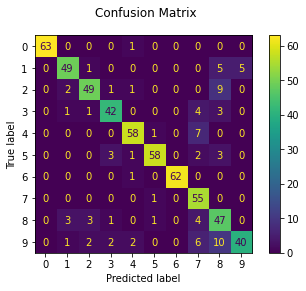

In [9]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()